<a href="https://colab.research.google.com/github/Hazuna227/221230039-Pengantar-ML/blob/main/week-08/praktikum_3_visualisasi_data_Load_Dataset_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================
# 1. IMPORT LIBRARIES
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# ============================================
# 2. LOAD DATASET DARI SKLEARN
# ============================================
data = load_diabetes()

# Convert ke DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# ============================================
# 3. INFO DATASET
# ============================================
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


**Exploratory Data Analysis (EDA)**

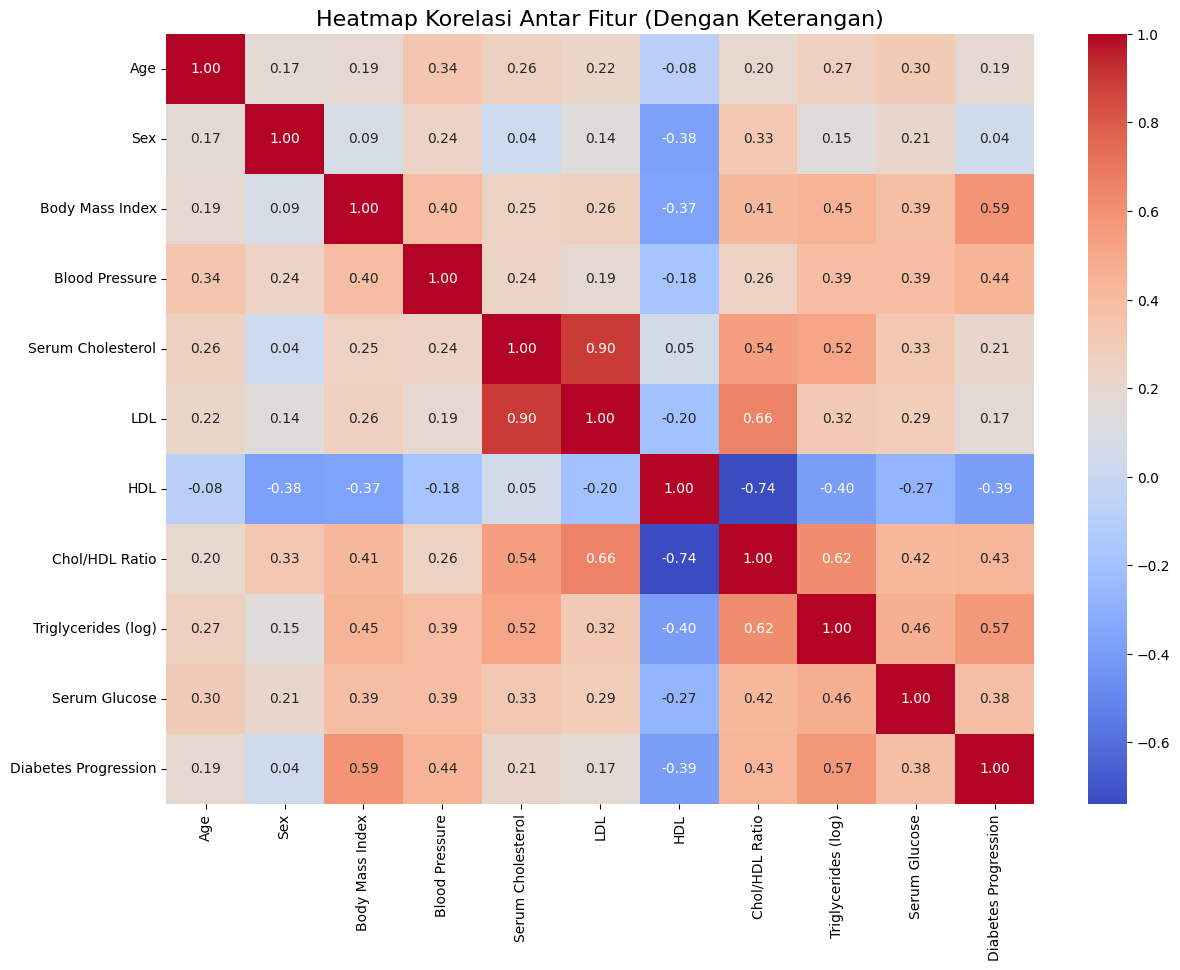

In [36]:
rename_map = {
    "age": "Age",
    "sex": "Sex",
    "bmi": "Body Mass Index",
    "bp": "Blood Pressure",
    "s1": "Serum Cholesterol",
    "s2": "LDL",
    "s3": "HDL",
    "s4": "Chol/HDL Ratio",
    "s5": "Triglycerides (log)",
    "s6": "Serum Glucose",
    "target": "Diabetes Progression"
}

df_renamed = df.rename(columns=rename_map)

plt.figure(figsize=(14,10))
sns.heatmap(df_renamed.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur (Dengan Keterangan)", fontsize=16)
plt.show()


In [37]:
corr_target = df.corr()["target"].abs().sort_values(ascending=False)
corr_target

,target
target,1.000000
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s3,0.394789
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054


In [38]:
top_features = corr_target.index[1:4]
top_features

Index(['bmi', 's5', 'bp'], dtype='object')

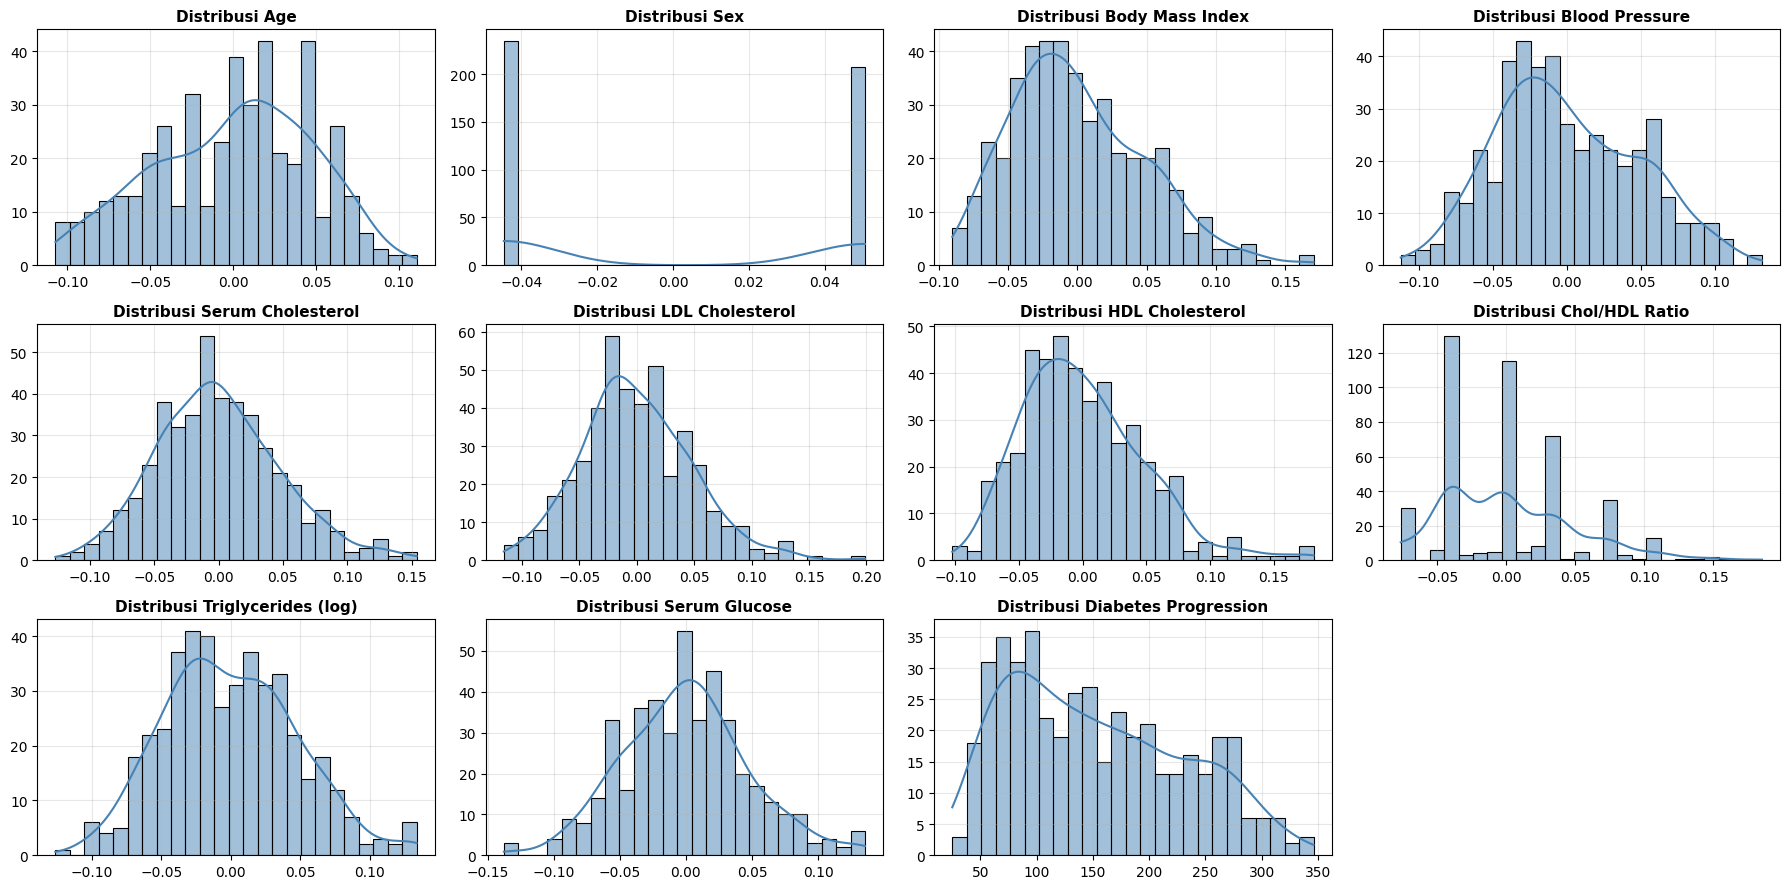

In [40]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping nama fitur (keterangan)
rename_map = {
    "age": "Age",
    "sex": "Sex",
    "bmi": "Body Mass Index",
    "bp": "Blood Pressure",
    "s1": "Serum Cholesterol",
    "s2": "LDL Cholesterol",
    "s3": "HDL Cholesterol",
    "s4": "Chol/HDL Ratio",
    "s5": "Triglycerides (log)",
    "s6": "Serum Glucose",
    "target": "Diabetes Progression"
}

# Ambil semua kolom numerik
cols = df.columns
n = len(cols)

# Atur jumlah kolom
cols_per_row = 4
rows = math.ceil(n / cols_per_row)

plt.figure(figsize=(18, rows * 3))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df[col], kde=True, bins=25, color='steelblue')

    # Gunakan nama baru untuk judul
    col_name = rename_map.get(col, col)

    plt.title(f"Distribusi {col_name}", fontsize=11, fontweight='bold')
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Preprocessing**

In [56]:
# Split dataset
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# StandardScaler SETELAH split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [57]:
# Evaluasi Model
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("===== Evaluasi Linear Regression =====")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

===== Evaluasi Linear Regression =====
MAE : 42.79409467959994
MSE : 2900.1936284934823
RMSE: 53.853445836765935
R²  : 0.45260276297191926


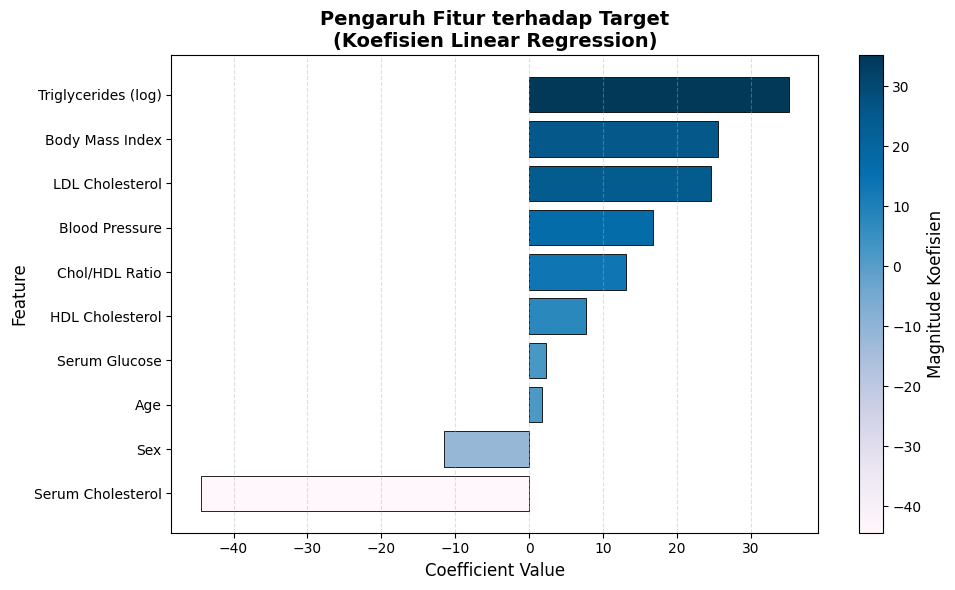

In [58]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Mapping nama fitur yang lebih jelas
rename_map = {
    "age": "Age",
    "sex": "Sex",
    "bmi": "Body Mass Index",
    "bp": "Blood Pressure",
    "s1": "Serum Cholesterol",
    "s2": "LDL Cholesterol",
    "s3": "HDL Cholesterol",
    "s4": "Chol/HDL Ratio",
    "s5": "Triglycerides (log)",
    "s6": "Serum Glucose",
}

# Ambil koefisien model
coef = pd.Series(model.coef_, index=X.columns)
coef_sorted = coef.sort_values()

# Rename index fitur
coef_sorted.index = [rename_map.get(col, col) for col in coef_sorted.index]

# Colormap biru
cmap = plt.cm.PuBu
norm = mpl.colors.Normalize(vmin=coef_sorted.min(), vmax=coef_sorted.max())
colors = cmap(norm(coef_sorted.values))

# Figure
fig, ax = plt.subplots(figsize=(10, 6))

# Barplot
bars = ax.barh(coef_sorted.index, coef_sorted.values,
               color=colors, edgecolor="black", linewidth=0.6)

# Judul & label
ax.set_title("Pengaruh Fitur terhadap Target\n(Koefisien Linear Regression)",
             fontsize=14, fontweight="bold")
ax.set_xlabel("Coefficient Value", fontsize=12)
ax.set_ylabel("Feature", fontsize=12)

# Colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Magnitude Koefisien", fontsize=12)

# Grid
ax.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()